In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib for saving
# Restart kernel after installing 
!pip install joblib

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("data/ml_compile.csv")

In [68]:
df.columns

Index(['year_month', 'land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent', 'bear_rsf_mean', 'bear_rsf_var'],
      dtype='object')

In [69]:
df.describe()

,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent,bear_rsf_mean,bear_rsf_var
count,1392.000000,1392.000000,1392.000000,1392.000000,1428.000000,1434.000000,1446.000000,752.000000,506.000000,334.000000,334.000000
mean,8.762454,14.516995,3.000047,15.317030,0.122602,0.213536,0.213620,355.582926,11.405146,15.820979,3.045457
std,4.199958,4.294911,4.114758,1.259405,0.709268,0.620087,0.630979,28.949294,3.252910,2.430975,1.087362
min,1.395000,7.082000,-4.298000,12.839000,-1.951000,-1.772000,-1.647000,312.430000,3.565600,6.093212,0.000000
25%,4.655750,10.426250,-1.103250,14.150750,-0.354250,-0.184750,-0.198000,329.112500,8.571152,14.872230,2.420035
50%,9.087500,14.899000,3.213500,15.373000,0.022500,0.140500,0.098000,352.880000,12.095933,16.388356,2.949145
75%,12.953000,18.867000,7.048000,16.477750,0.583250,0.563500,0.576500,378.857500,14.318582,17.471275,3.629055
max,15.482000,21.320000,9.715000,17.611000,2.970000,2.805000,2.877000,417.070000,16.341938,20.000000,6.027518


In [79]:
df2 = df.dropna(axis=0, how="any")

In [80]:
df2.describe()

,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent,bear_rsf_mean,bear_rsf_var
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,9.385082,15.100323,3.750175,15.712589,0.880915,0.782644,0.798637,372.225619,11.357481,15.851405,3.050767
std,4.121994,4.236401,3.995320,1.225211,0.496381,0.535807,0.511061,16.649756,3.220250,2.392539,1.089249
min,2.710000,8.095000,-2.768000,13.566000,-0.531000,-0.800000,-0.668000,343.130000,3.565600,6.093212,0.000000
25%,5.552000,11.217500,-0.155000,14.511000,0.583000,0.419000,0.450000,356.145000,8.513177,14.928223,2.430938
50%,9.618000,15.529000,3.987000,15.811000,0.902000,0.787000,0.791000,372.250000,12.016400,16.396830,2.959421
75%,13.443000,19.230500,7.743500,16.884000,1.182500,1.137500,1.116000,386.235000,14.326682,17.470912,3.635628
max,15.482000,21.320000,9.715000,17.611000,2.554000,2.465000,2.510000,403.960000,16.050143,20.000000,6.027518


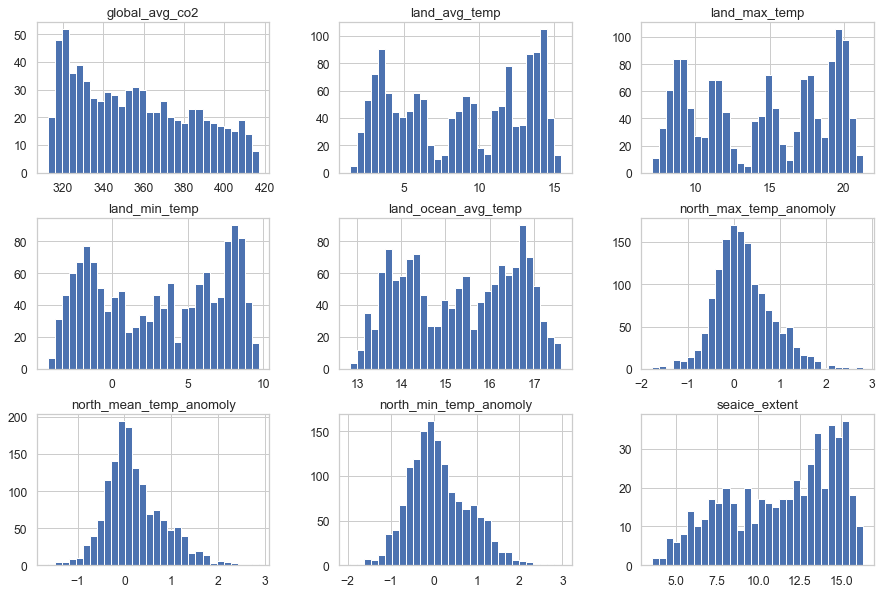

In [81]:
import seaborn as sns
import pandas as pd
numerical = ['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent']
X[numerical].hist(bins=30, figsize=(15, 10), layout=(3, 3));

# Preprocessing the Data

## Assign X(features) and y(target) data

In [85]:
X = df2[['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent']]
y_rsf = df2["bear_rsf_mean"].values.reshape(-1, 1)
y_var = df2["bear_rsf_var"].values.reshape(-1, 1)
print(X.shape, y_rsf.shape)

(331, 9) (331, 1)


## Split the data into testing and training dataset

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_rsf_train, y_rsf_test = train_test_split(X, y_rsf, test_size=0.2, random_state=42)
X_train, X_test, y_var_train, y_var_test = train_test_split(X, y_var, test_size=0.2, random_state=42)

## MinMaxScalar to fit and transform X features and y target

In [87]:
#Fit Transform using MinMaxScalar for X features
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_rsf_minmax = MinMaxScaler().fit(y_rsf_train)
y_var_minmax = MinMaxScaler().fit(y_var_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

#Target value #1
y_rsf_train_minmax = y_rsf_minmax.transform(y_rsf_train)
y_rsf_test_minmax = y_rsf_minmax.transform(y_rsf_test)

#Target value #2
y_var_train_minmax = y_var_minmax.transform(y_var_train)
y_var_test_minmax = y_var_minmax.transform(y_var_test)

# Linear Regression Analysis

## RSF

In [88]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_minmax, y_rsf_train_minmax)

LinearRegression()

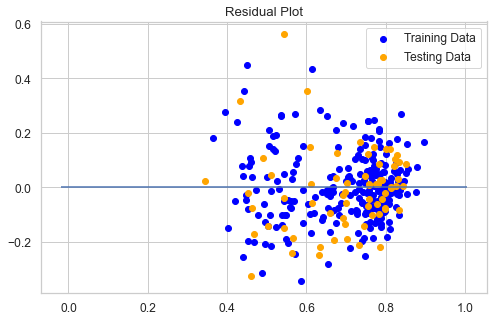

In [94]:
# Make Prediction using a FIT model and plot ==SEE BELOW FOR ALTERNATIVES==
predictions = model.predict(X_test_minmax)
model.fit(X_train_minmax, y_rsf_train_minmax)

plt.scatter(model.predict(X_train_minmax), model.predict(X_train_minmax) - y_rsf_train_minmax, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax), model.predict(X_test_minmax) - y_rsf_test_minmax, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_rsf_test_minmax.min(), xmax=y_rsf_test_minmax.max())
plt.title("Residual Plot")
plt.show()

## RSF variability

In [97]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_minmax, y_var_train_minmax)

LinearRegression()

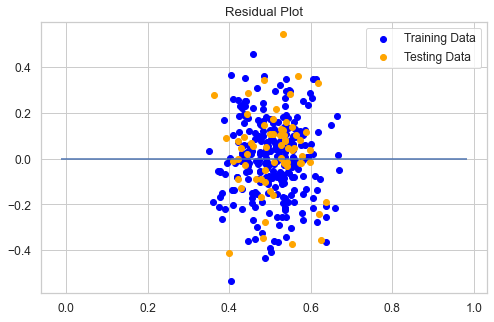

In [98]:
predictions = model.predict(X_test_minmax)
model.fit(X_train_minmax, y_var_train_minmax)

plt.scatter(model.predict(X_train_minmax), model.predict(X_train_minmax) - y_var_train_minmax, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax), model.predict(X_test_minmax) - y_var_test_minmax, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_var_test_minmax.min(), xmax=y_var_test_minmax.max())
plt.title("Residual Plot")
plt.show()

In [99]:
# Validate the Model with MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_var_test_minmax, predictions)
r2 = model.score(X_test_minmax, y_var_test_minmax)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.03142772673578154, R2: 0.08579100406692552
